<a href="https://colab.research.google.com/github/asadujjaman420/Applied-Machine-learning-/blob/main/Fractional_SUPPLY_DEMAND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atangana-Baleanu Fractal-Fractional Energy Model Solver
Fractional order (υ): 0.95
Fractal dimension (ζ): 0.95
Time step: 0.01, Total time: 10.0
AB(υ) = 0.971031
Progress: 10.0% | t = 1.00 | X = [0.6885, 0.4009, 0.0163, 0.2438]
Progress: 20.0% | t = 2.00 | X = [1.0328, 0.3950, 0.0225, 0.1953]
Progress: 30.0% | t = 3.00 | X = [1.5769, 0.1470, 1.1077, 0.1991]
Progress: 40.0% | t = 4.00 | X = [0.4747, 0.2214, 1.4840, 0.1603]
Progress: 50.0% | t = 5.00 | X = [0.7453, 0.3094, 0.3851, 0.1329]
Progress: 59.9% | t = 6.00 | X = [1.0933, 0.3995, 0.7833, 0.1382]
Progress: 69.9% | t = 7.00 | X = [0.7559, 0.6398, 2.6542, 0.1423]
Progress: 79.9% | t = 8.00 | X = [0.6785, 0.4201, 0.7290, 0.1226]
Progress: 89.9% | t = 9.00 | X = [0.9154, 0.4518, 0.5717, 0.1223]
Progress: 99.9% | t = 10.00 | X = [1.0350, 0.5801, 1.8434, 0.1346]
Simulation complete!


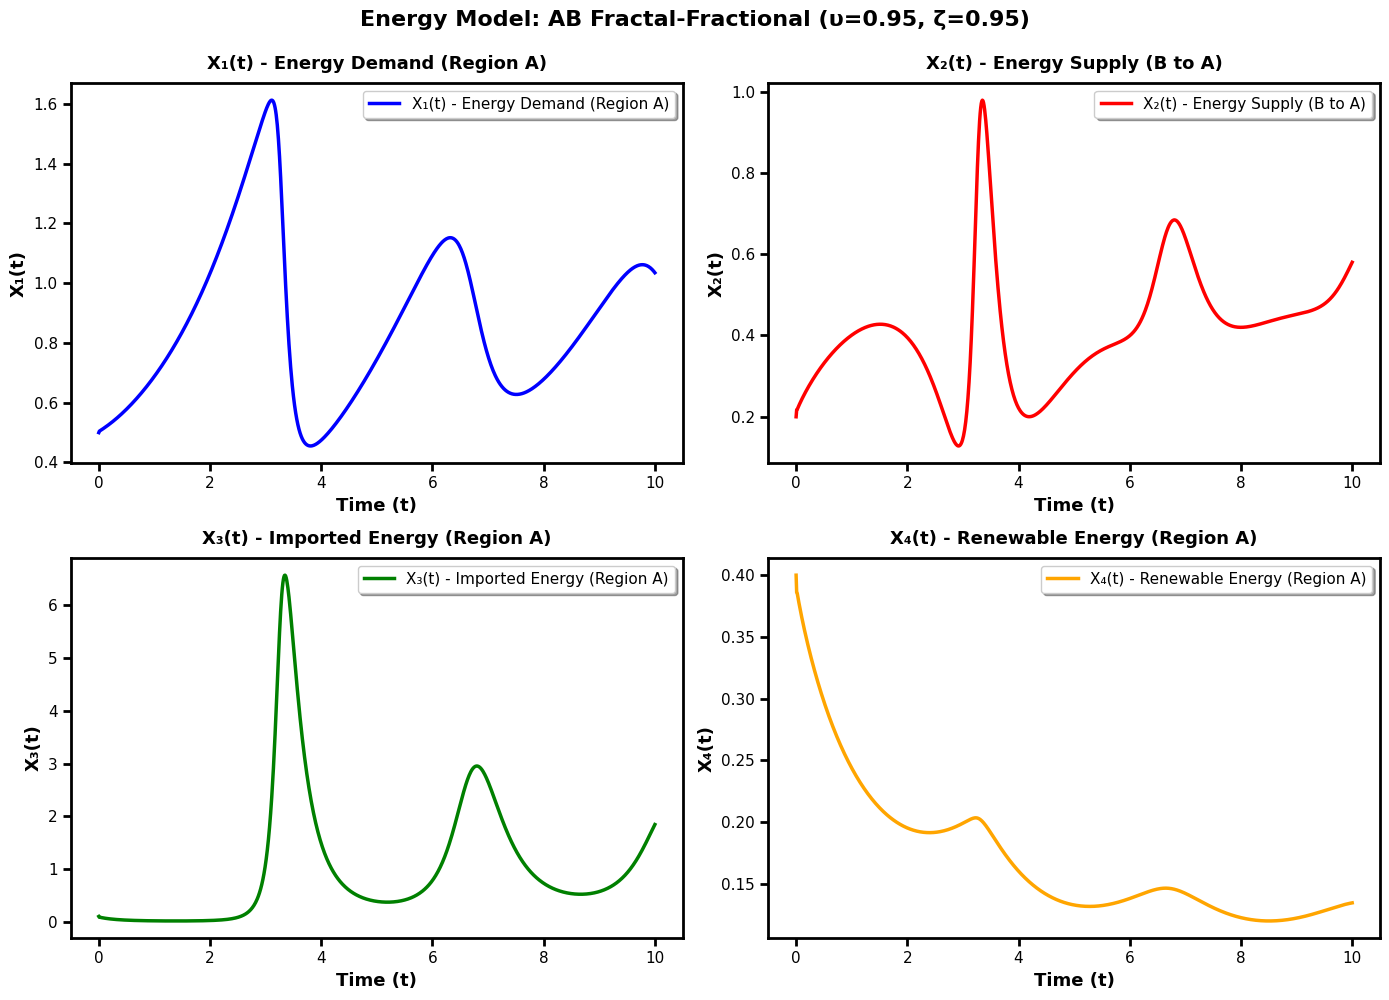

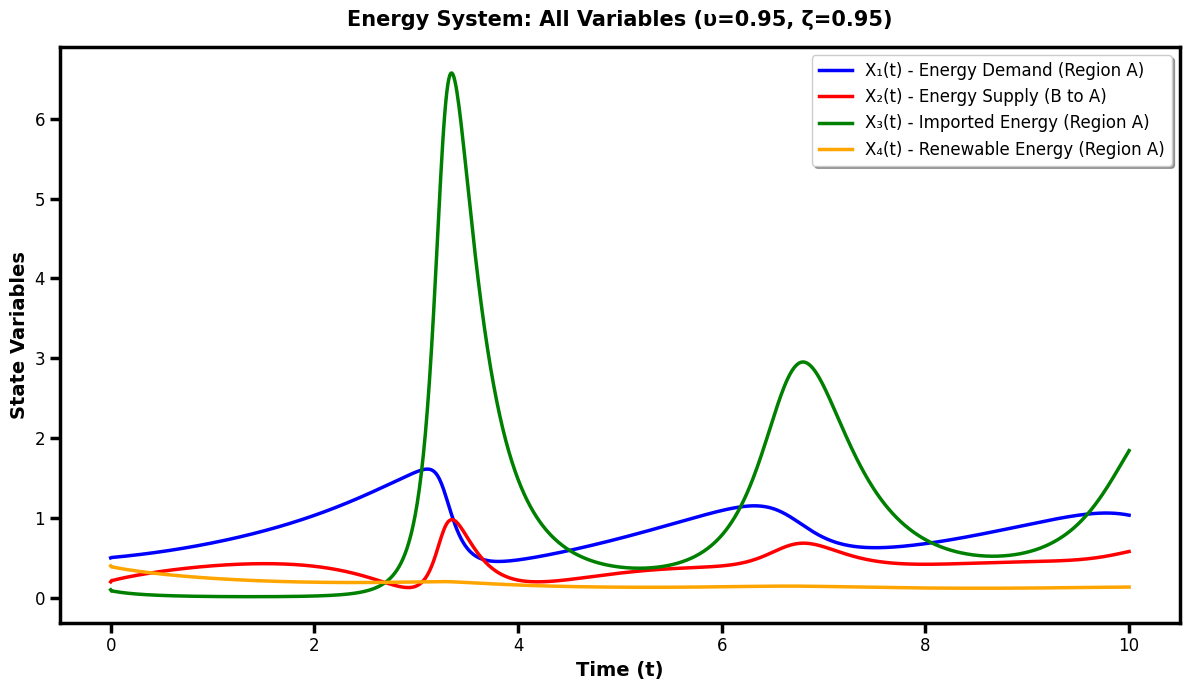

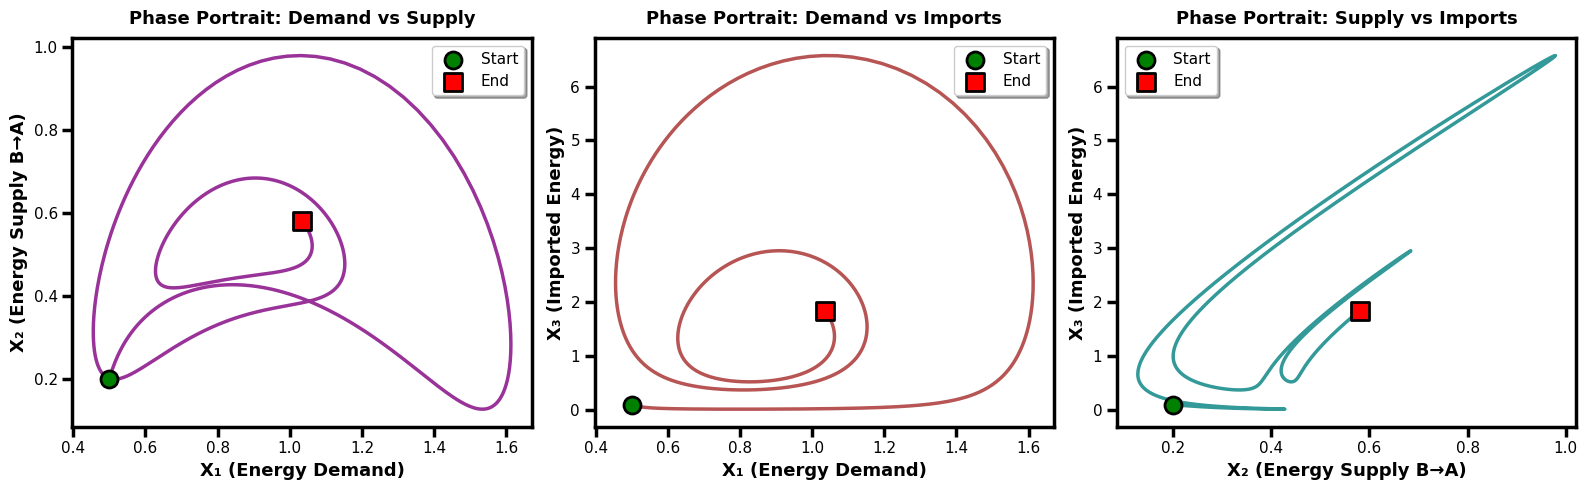


Initial state at t=0:
  X₁(t)                              : 0.500000
  X₂(t)                              : 0.200000
  X₃(t)                              : 0.100000
  X₄(t)                              : 0.400000

Final state at t=10.00:
  X₁(t)                              : 1.035048
  X₂(t)                              : 0.580109
  X₃(t)                              : 1.843429
  X₄(t)                              : 0.134631

Min/Max values over time:
  X₁(t)                              : [0.455333, 1.612492]
  X₂(t)                              : [0.128173, 0.979018]
  X₃(t)                              : [0.014125, 6.573972]
  X₄(t)                              : [0.119972, 0.400000]

Model Parameters:
a₁ = 1.0, a₂ = 0.6, d₃ = 0.8, W = 3.8
z₁ = 1.0, z₂ = 1.2, z₃ = 1.5, N = 1.2 (N < W: True)
s₁ = 11.0, s₂ = 0.7, s₃ = 0.6
d₁ = 0.1, d₂ = 0.7

Variable Definitions:
X₁: Energy resource demand of region A
X₂: Energy resource supply provided by region B to A
X₃: Amount of energy importe

In [ ]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

# Time parameters
ts = 0.01
t = np.arange(0, 10 + ts, ts)
N_t = len(t)

# Fractional order (υ) and fractal dimension (ζ)
upsilon = 0.95  # fractional order (0 < υ ≤ 1)
zeta = 0.95     # fractal dimension (0 < ζ ≤ 1)

# Atangana-Baleanu normalization function
def AB(upsilon):
    """AB(υ) = 1 - υ + υ/Γ(υ)"""
    if upsilon == 1:
        return 1.0
    return (1 - upsilon) + upsilon / gamma(upsilon)

# Model parameters (as specified in the paper)
# All parameters are positive constants, and N < W
a1 = 1.0
a2 = 0.6
z1 = 1.0
z2 = 1.2
z3 = 1.5
s1 = 11.0
s2 = 0.7
s3 = 0.6
d1 = 0.1
d2 = 0.7
d3 = 0.8
W = 3.8
N = 1.2  # N < W condition satisfied

# Initial conditions [X1, X2, X3, X4]
# X1: Energy resource demand of region A
# X2: Energy resource supply provided by region B to A
# X3: Amount of energy imported by region A
# X4: Renewable energy resources available in region A
X = np.zeros((N_t, 4))
X[0] = [0.5, 0.2, 0.1, 0.4]  # Initial state

# Right-hand side functions H1 to H4 (from equation 1)
def H1(X1, X2, X3, X4):
    """Energy demand dynamics of region A"""
    return a1*X1*(1 - X1/W) - a2*X2*(X2 + X3) - d3*X4

def H2(X1, X2, X3, X4):
    """Energy supply dynamics from region B to A"""
    return -z1*X2 - z2*X3 + z3*X1*(N - (X1 - X3))

def H3(X1, X2, X3, X4):
    """Imported energy dynamics"""
    return s1*X3*(s2*X1 - s3)

def H4(X1, X2, X3, X4):
    """Renewable energy dynamics in region A"""
    return d1*X1 - d2*X4

# Vector of H functions
def H_vector(X_val):
    X1, X2, X3, X4 = X_val
    return np.array([
        H1(X1, X2, X3, X4),
        H2(X1, X2, X3, X4),
        H3(X1, X2, X3, X4),
        H4(X1, X2, X3, X4)
    ])

# Atangana-Baleanu fractal-fractional solver
print("=" * 60)
print("Atangana-Baleanu Fractal-Fractional Energy Model Solver")
print("=" * 60)
print(f"Fractional order (υ): {upsilon}")
print(f"Fractal dimension (ζ): {zeta}")
print(f"Time step: {ts}, Total time: {t[-1]}")
print(f"AB(υ) = {AB(upsilon):.6f}")
print("=" * 60)

AB_val = AB(upsilon)
gamma_upsilon = gamma(upsilon)

for n in range(N_t - 1):
    t_n = t[n]
    t_np1 = t[n + 1]

    # First term: non-fractional memory part
    # (ζ(1-υ)t^(ζ-1))/AB(υ) · H(t, X)
    H_current = H_vector(X[n])
    term1 = (zeta * (1 - upsilon) * t_np1**(zeta - 1)) / AB_val * H_current

    # Second term: fractional integral part
    # (υζ)/(AB(υ)Γ(υ)) ∫₀ᵗ (t-ξ)^(υ-1)ξ^(ζ-1)H(ξ,X)dξ
    term2 = np.zeros(4)

    if n > 0:
        # Numerical integration using trapezoidal rule
        for j in range(n + 1):
            xi = t[j]

            # Kernel: (t_{n+1} - ξ)^(υ-1) · ξ^(ζ-1)
            if xi > 0:
                kernel = (t_np1 - xi)**(upsilon - 1) * xi**(zeta - 1)
                H_xi = H_vector(X[j])

                # Trapezoidal weights
                if j == 0 or j == n:
                    weight = 0.5
                else:
                    weight = 1.0

                term2 += weight * kernel * H_xi

        term2 *= ts * (upsilon * zeta) / (AB_val * gamma_upsilon)

    # Update solution: X(t_{n+1}) = X(0) + term1 + term2
    X[n + 1] = X[0] + term1 + term2

    # Progress indicator
    if (n + 1) % 100 == 0:
        progress = (n + 1) / N_t * 100
        print(f"Progress: {progress:.1f}% | t = {t_np1:.2f} | X = [{X[n+1,0]:.4f}, {X[n+1,1]:.4f}, {X[n+1,2]:.4f}, {X[n+1,3]:.4f}]")

print("=" * 60)
print("Simulation complete!")
print("=" * 60)

# Plot results - Professional styling with CORRECT labels
labels = ['X₁(t) - Energy Demand (Region A)',
          'X₂(t) - Energy Supply (B to A)',
          'X₃(t) - Imported Energy (Region A)',
          'X₄(t) - Renewable Energy (Region A)']
colors = ['blue', 'red', 'green', 'orange']

# Individual subplots with professional styling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i in range(4):
    axes[i].plot(t, X[:, i], label=labels[i], color=colors[i], linewidth=2.5)
    axes[i].set_xlabel('Time (t)', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(labels[i].split('-')[0].strip(), fontsize=13, fontweight='bold')
    axes[i].set_title(labels[i], fontsize=13, fontweight='bold', pad=10)
    axes[i].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)

    # Make borders bold
    for spine in axes[i].spines.values():
        spine.set_linewidth(2)

    # Tick parameters - make ticks outside and larger
    axes[i].tick_params(axis='both', which='major', labelsize=11, width=2, length=6,
                        direction='out', top=False, right=False)
    axes[i].tick_params(axis='both', which='minor', width=1.5, length=4, direction='out')

plt.suptitle(f'Energy Model: AB Fractal-Fractional (υ={upsilon}, ζ={zeta})',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Combined plot with professional styling
plt.figure(figsize=(12, 7))
for i in range(4):
    plt.plot(t, X[:, i], label=labels[i], color=colors[i], linewidth=2.5)

plt.xlabel('Time (t)', fontsize=14, fontweight='bold')
plt.ylabel('State Variables', fontsize=14, fontweight='bold')
plt.title(f'Energy System: All Variables (υ={upsilon}, ζ={zeta})',
          fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=12, frameon=True, shadow=True, fancybox=True, loc='best')

# Make borders bold
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2.5)

# Tick parameters - make ticks outside and larger
plt.tick_params(axis='both', which='major', labelsize=12, width=2.5, length=7,
                direction='out', top=False, right=False)
plt.tick_params(axis='both', which='minor', width=1.5, length=4, direction='out')

plt.tight_layout()
plt.show()

# Phase portraits with professional styling and CORRECT labels
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# X1 vs X2
axes[0].plot(X[:, 0], X[:, 1], color='purple', linewidth=2.5, alpha=0.8)
axes[0].scatter(X[0, 0], X[0, 1], color='green', s=150, marker='o', label='Start',
                zorder=5, edgecolors='black', linewidths=2)
axes[0].scatter(X[-1, 0], X[-1, 1], color='red', s=150, marker='s', label='End',
                zorder=5, edgecolors='black', linewidths=2)
axes[0].set_xlabel('X₁ (Energy Demand)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('X₂ (Energy Supply B→A)', fontsize=13, fontweight='bold')
axes[0].set_title('Phase Portrait: Demand vs Supply', fontsize=13, fontweight='bold', pad=10)
axes[0].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)

# X1 vs X3
axes[1].plot(X[:, 0], X[:, 2], color='brown', linewidth=2.5, alpha=0.8)
axes[1].scatter(X[0, 0], X[0, 2], color='green', s=150, marker='o', label='Start',
                zorder=5, edgecolors='black', linewidths=2)
axes[1].scatter(X[-1, 0], X[-1, 2], color='red', s=150, marker='s', label='End',
                zorder=5, edgecolors='black', linewidths=2)
axes[1].set_xlabel('X₁ (Energy Demand)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('X₃ (Imported Energy)', fontsize=13, fontweight='bold')
axes[1].set_title('Phase Portrait: Demand vs Imports', fontsize=13, fontweight='bold', pad=10)
axes[1].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)

# X2 vs X3
axes[2].plot(X[:, 1], X[:, 2], color='teal', linewidth=2.5, alpha=0.8)
axes[2].scatter(X[0, 1], X[0, 2], color='green', s=150, marker='o', label='Start',
                zorder=5, edgecolors='black', linewidths=2)
axes[2].scatter(X[-1, 1], X[-1, 2], color='red', s=150, marker='s', label='End',
                zorder=5, edgecolors='black', linewidths=2)
axes[2].set_xlabel('X₂ (Energy Supply B→A)', fontsize=13, fontweight='bold')
axes[2].set_ylabel('X₃ (Imported Energy)', fontsize=13, fontweight='bold')
axes[2].set_title('Phase Portrait: Supply vs Imports', fontsize=13, fontweight='bold', pad=10)
axes[2].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)

# Apply professional styling to all phase portrait axes
for ax in axes:
    # Make borders bold
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    # Tick parameters
    ax.tick_params(axis='both', which='major', labelsize=11, width=2.5, length=7,
                   direction='out', top=False, right=False)
    ax.tick_params(axis='both', which='minor', width=1.5, length=4, direction='out')

plt.tight_layout()
plt.show()

# Print diagnostics with CORRECT variable names
print(f"\nInitial state at t=0:")
for i, label in enumerate(labels):
    print(f"  {label.split('-')[0].strip():35s}: {X[0, i]:.6f}")

print(f"\nFinal state at t={t[-1]:.2f}:")
for i, label in enumerate(labels):
    print(f"  {label.split('-')[0].strip():35s}: {X[-1, i]:.6f}")

print(f"\nMin/Max values over time:")
for i, label in enumerate(labels):
    print(f"  {label.split('-')[0].strip():35s}: [{X[:, i].min():.6f}, {X[:, i].max():.6f}]")

print("\n" + "=" * 60)
print("Model Parameters:")
print("=" * 60)
print(f"a₁ = {a1}, a₂ = {a2}, d₃ = {d3}, W = {W}")
print(f"z₁ = {z1}, z₂ = {z2}, z₃ = {z3}, N = {N} (N < W: {N < W})")
print(f"s₁ = {s1}, s₂ = {s2}, s₃ = {s3}")
print(f"d₁ = {d1}, d₂ = {d2}")
print("=" * 60)
print("\nVariable Definitions:")
print("=" * 60)
print("X₁: Energy resource demand of region A")
print("X₂: Energy resource supply provided by region B to A")
print("X₃: Amount of energy imported by region A")
print("X₄: Renewable energy resources available in region A")
print("=" * 60)

Computing numerical reference solution...
Numerical solution computed. Time points: 1001
Starting training (data-assisted PINN)...
Epoch 1/5000 | loss 1.158e+02 | phys 3.790e+01 | data 7.786e-01
  sample preds: [[-0.08345815539360046, -0.0190952867269516, 0.09652845561504364, 0.03254741057753563], [0.13532334566116333, 0.13328075408935547, -0.10328032076358795, -0.032536186277866364], [0.16351377964019775, 0.19125714898109436, -0.10184289515018463, -0.03293316811323166], [0.17257173359394073, 0.21993151307106018, -0.08433301746845245, -0.03132428973913193]]
Epoch 100/5000 | loss 3.580e+01 | phys 1.021e-01 | data 3.570e-01
  sample preds: [[0.3651048541069031, 0.291729211807251, -0.40765777230262756, 0.3250456750392914], [0.9190369844436646, 0.4248991906642914, 1.073643684387207, 0.17695990204811096], [0.8695144057273865, 0.4572853147983551, 1.347200632095337, 0.13143454492092133], [0.7987833023071289, 0.48918023705482483, 1.1455678939819336, 0.1663021296262741]]
Epoch 200/5000 | loss 3

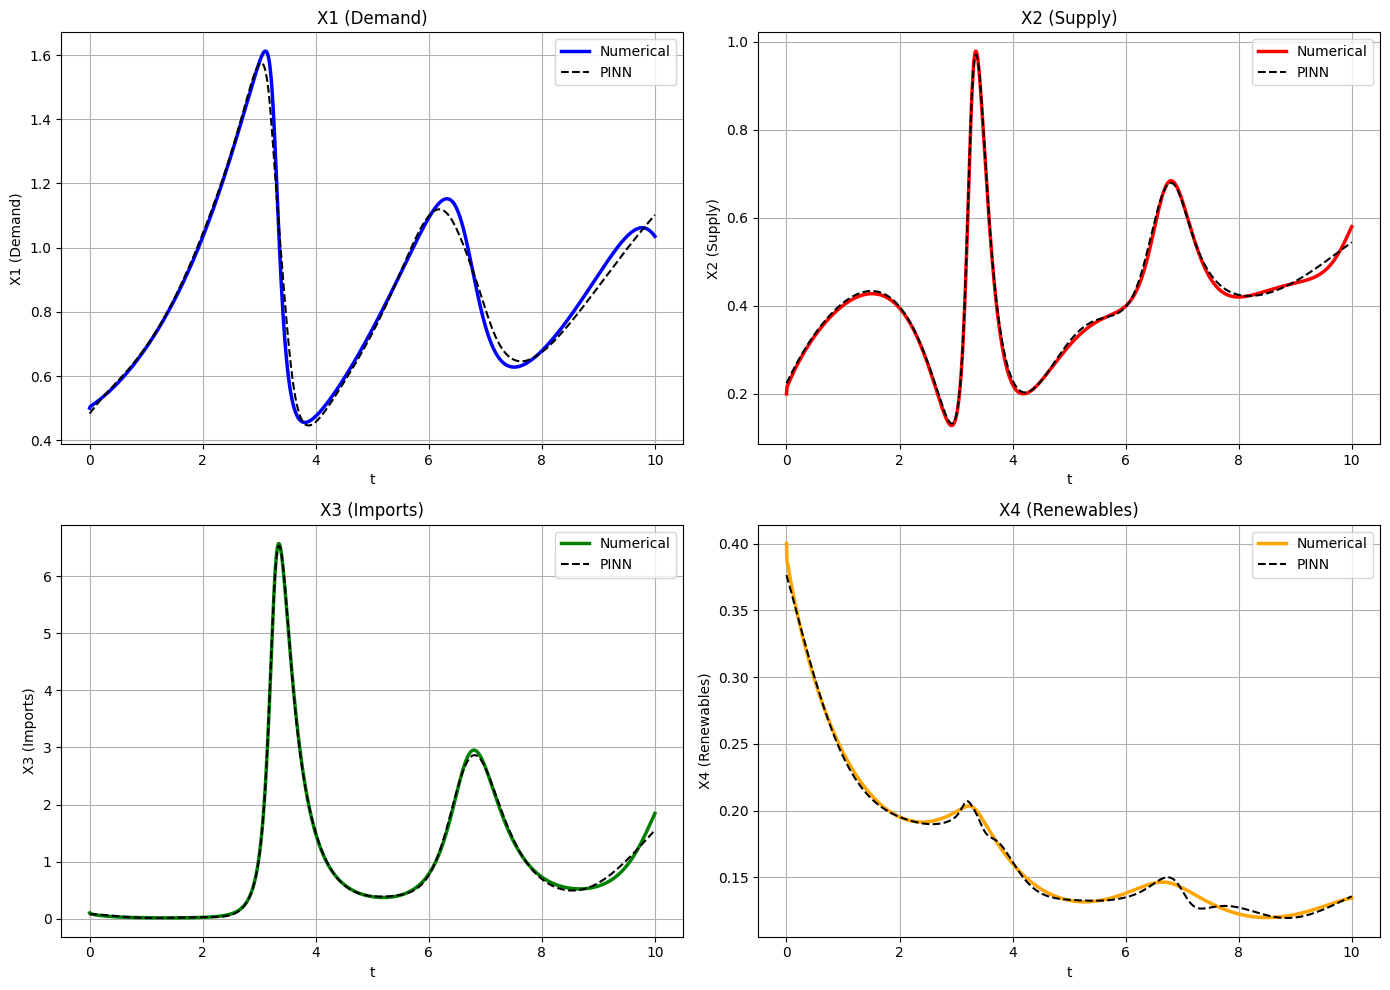

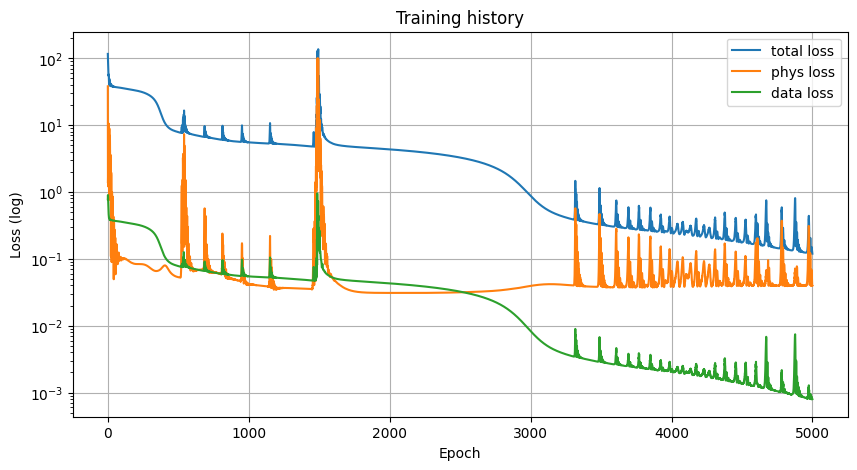

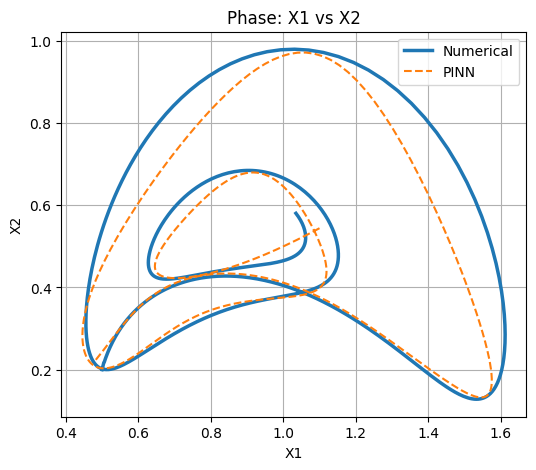

Saved results to 'pinn_results/pinn_fit_to_numerical.npz'

Tips:
 - If PINN underfits, increase network width/depth or increase epochs.
 - If memory/GPU is a constraint, reduce m_q or Nc (collocation points).
 - To prioritize data fit, increase w_data; to emphasize physics, increase w_phys.
 - For better integral accuracy, increase m_q or use Gauss-Jacobi quadrature adapted to kernel.


In [ ]:
# pinn_fit_to_numerical.py
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.special import gamma as scipy_gamma
import time
import os

# ----------------------------
# Device and dtype
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float32)

# ----------------------------
# Problem parameters (same as yours)
# ----------------------------
ts = 0.01
t = np.arange(0.0, 10.0 + ts, ts)   # numerical grid: 0:0.01:10
N_t = len(t)

upsilon = 0.95
zeta = 0.95

def AB(upsilon):
    if abs(upsilon - 1.0) < 1e-12:
        return 1.0
    return (1.0 - upsilon) + upsilon / scipy_gamma(upsilon)

AB_val = AB(upsilon)
gamma_upsilon = scipy_gamma(upsilon)

# model constants
a1 = 1.0; a2 = 0.6; z1 = 1.0; z2 = 1.2; z3 = 1.5
s1 = 11.0; s2 = 0.7; s3 = 0.6
d1 = 0.1; d2 = 0.7; d3 = 0.8
W = 3.8; N_param = 1.2

# initial condition
X0 = np.array([0.5, 0.2, 0.1, 0.4], dtype=np.float32)

# ----------------------------
# Numerical solver (your method)
# ----------------------------
def numerical_solver(ts=ts):
    t_arr = np.arange(0.0, 10.0 + ts, ts)
    N_t_local = len(t_arr)
    X = np.zeros((N_t_local, 4), dtype=np.float64)
    X[0] = X0.copy()

    for n in range(N_t_local - 1):
        t_np1 = t_arr[n+1]
        H_current = H_vector_numpy(X[n])
        term1 = (zeta * (1 - upsilon) * (t_np1**(zeta - 1.0))) / AB_val * H_current

        term2 = np.zeros(4, dtype=np.float64)
        if n > 0:
            for j in range(n+1):
                xi = t_arr[j]
                if xi > 0:
                    kernel = (t_np1 - xi)**(upsilon - 1.0) * xi**(zeta - 1.0)
                    H_xi = H_vector_numpy(X[j])
                    weight = 0.5 if (j==0 or j==n) else 1.0
                    term2 += weight * kernel * H_xi
            term2 *= ts * (upsilon * zeta) / (AB_val * gamma_upsilon)

        X[n+1] = X[0] + term1 + term2

    return t_arr, X

def H_vector_numpy(Xval):
    # Xval: (...,4) or (4,)
    X1, X2, X3, X4 = Xval[...,0], Xval[...,1], Xval[...,2], Xval[...,3]
    H1 = a1*X1*(1 - X1/W) - a2*X2*(X2 + X3) - d3*X4
    H2 = -z1*X2 - z2*X3 + z3*X1*(N_param - (X1 - X3))
    H3 = s1*X3*(s2*X1 - s3)
    H4 = d1*X1 - d2*X4
    return np.stack([H1, H2, H3, H4], axis=-1)

# Compute numerical solution (this can take some seconds)
print("Computing numerical reference solution...")
t_num, X_num = numerical_solver(ts=ts)
print("Numerical solution computed. Time points:", len(t_num))

# ----------------------------
# Torch wrappers for H
# ----------------------------
def H_torch(X):
    # X: (...,4) torch tensor
    X1 = X[...,0]; X2 = X[...,1]; X3 = X[...,2]; X4 = X[...,3]
    H1 = a1*X1*(1 - X1/W) - a2*X2*(X2 + X3) - d3*X4
    H2 = -z1*X2 - z2*X3 + z3*X1*(N_param - (X1 - X3))
    H3 = s1*X3*(s2*X1 - s3)
    H4 = d1*X1 - d2*X4
    return torch.stack([H1, H2, H3, H4], dim=-1)

# ----------------------------
# PINN network
# ----------------------------
class PINN(nn.Module):
    def __init__(self, hidden_layers=[128,128,128], act=nn.Tanh()):
        super().__init__()
        layers = []
        prev = 1
        for h in hidden_layers:
            layers.append(nn.Linear(prev, h))
            layers.append(act)
            prev = h
        layers.append(nn.Linear(prev, 4))
        self.net = nn.Sequential(*layers)

    def forward(self, t_in):
        # t_in: (B,1)
        return self.net(t_in)

# ----------------------------
# Integral approximation (vectorized)
# ----------------------------
def integral_term_torch(t_batch, net, m_q=40):
    """
    t_batch: (B,1) tensor
    returns term2: (B,4)
    """
    B = t_batch.shape[0]
    device_local = t_batch.device
    m = m_q

    s = torch.linspace(0.0, 1.0, steps=m, device=device_local).reshape(1, m)  # (1,m)
    t_expand = t_batch.reshape(B, 1)  # (B,1)
    xi = t_expand * s                 # (B,m)

    xi_flat = xi.reshape(-1,1)        # (B*m,1)
    X_xi_flat = net(xi_flat)          # (B*m,4)
    X_xi = X_xi_flat.reshape(B, m, 4) # (B,m,4)
    H_xi = H_torch(X_xi)              # (B,m,4)

    t_minus_xi = (t_expand - xi).clamp(min=1e-12)  # (B,m)
    xi_pos = xi.clamp(min=1e-12)                   # (B,m)

    kernel = (t_minus_xi ** (upsilon - 1.0)) * (xi_pos ** (zeta - 1.0))  # (B,m)
    w = torch.ones(m, device=device_local)
    w[0] = 0.5; w[-1] = 0.5
    w = w.reshape(1,m)

    integrand = kernel.unsqueeze(-1) * H_xi  # (B,m,4)
    weighted = (w.unsqueeze(-1) * integrand).sum(dim=1)  # (B,4)

    ds = 1.0 / (m - 1)
    integral_result = weighted * (ds * t_expand)  # (B,4)

    pref = (upsilon * zeta) / (AB_val * gamma_upsilon)
    term2 = pref * integral_result
    return term2

# ----------------------------
# Residual (physics) function
# ----------------------------
def residual_net(t_batch, net, m_q):
    """
    R(t) = net(t) - X0 - term1 - term2
    returns R (B,4) and X_pred (B,4)
    """
    t_batch = t_batch.reshape(-1,1)
    t_req = t_batch.clone().detach().requires_grad_(True)
    X_pred = net(t_req)   # (B,4)
    H_curr = H_torch(X_pred)  # (B,4)

    t_pow = (t_req.clamp(min=1e-12) ** (zeta - 1.0))
    term1 = (zeta * (1.0 - upsilon) * t_pow / AB_val) * H_curr  # (B,4)

    term2 = integral_term_torch(t_req, net, m_q=m_q)  # (B,4)

    X0_t = torch.tensor(X0, dtype=torch.float32, device=device).reshape(1,4)
    X0_rep = X0_t.repeat(X_pred.shape[0], 1)
    R = X_pred - X0_rep - term1 - term2
    return R, X_pred

# ----------------------------
# Training: combined loss (physics + supervised)
# ----------------------------
def train_data_assisted_pinn(net,
                            t_collocation,
                            t_supervised,
                            X_supervised,
                            epochs=5000,
                            m_q=40,
                            lr=1e-3,
                            w_phys=1.0,
                            w_data=100.0,
                            print_every=100):
    """
    t_collocation: torch tensor (Nc,1) - times for residual loss (physics)
    t_supervised: torch tensor (Nd,1) - times where we have numerical data
    X_supervised: torch tensor (Nd,4) - numerical data values
    returns trained net and history dict
    """
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    mse = nn.MSELoss()
    history = {'loss':[], 'loss_phys':[], 'loss_data':[]}
    start = time.time()

    for ep in range(1, epochs+1):
        opt.zero_grad()

        # physics loss (residual)
        R, _ = residual_net(t_collocation, net, m_q=m_q)
        loss_phys = mse(R, torch.zeros_like(R))

        # data loss (supervised)
        X_pred_data = net(t_supervised)
        loss_data = mse(X_pred_data, X_supervised)

        loss = w_phys * loss_phys + w_data * loss_data
        loss.backward()
        opt.step()

        history['loss'].append(float(loss.item()))
        history['loss_phys'].append(float(loss_phys.item()))
        history['loss_data'].append(float(loss_data.item()))

        if ep % print_every == 0 or ep==1:
            with torch.no_grad():
                # simple diagnostics
                t_check = torch.tensor([[0.0],[t_num[-1]*0.25],[t_num[-1]*0.5],[t_num[-1]]], dtype=torch.float32, device=device)
                Xc = net(t_check).cpu().numpy()
            print(f"Epoch {ep}/{epochs} | loss {loss.item():.3e} | phys {loss_phys.item():.3e} | data {loss_data.item():.3e}")
            print("  sample preds:", Xc.tolist())

    end = time.time()
    print(f"Training time: {end-start:.2f} s")
    return net, history

# ----------------------------
# Prepare collocation and supervised data
# ----------------------------
# Collocation points: sample in (0, t_final], avoid exactly 0 due to kernel singularity
Nc = 800            # number of collocation points for physics constraint
Nd = 400            # number of supervised points (from numerical solution)
np.random.seed(42)

# collocation times (random subset of numerical grid excluding t=0)
coll_idx = np.random.choice(np.arange(1, N_t), size=Nc, replace=False)
t_coll = t_num[coll_idx].astype(np.float32).reshape(-1,1)
t_coll_t = torch.tensor(t_coll, dtype=torch.float32, device=device)

# supervised (data) times: choose Nd points from numerical grid (could be all)
data_idx = np.linspace(0, N_t-1, Nd, dtype=int)
t_data = t_num[data_idx].astype(np.float32).reshape(-1,1)
X_data = X_num[data_idx].astype(np.float32)
t_data_t = torch.tensor(t_data, dtype=torch.float32, device=device)
X_data_t = torch.tensor(X_data, dtype=torch.float32, device=device)

# ----------------------------
# Initialize network and train
# ----------------------------
net = PINN(hidden_layers=[128,128,128]).to(device)

# hyperparameters you can tune
epochs = 5000
m_q = 40
lr = 1e-3
w_phys = 1.0
w_data = 100.0   # strong weight to force fit to numerical solution

print("Starting training (data-assisted PINN)...")
net, history = train_data_assisted_pinn(net,
                                       t_collocation=t_coll_t,
                                       t_supervised=t_data_t,
                                       X_supervised=X_data_t,
                                       epochs=epochs,
                                       m_q=m_q,
                                       lr=lr,
                                       w_phys=w_phys,
                                       w_data=w_data,
                                       print_every=100)

# ----------------------------
# Evaluate on full grid and compare
# ----------------------------
t_grid = t_num.astype(np.float32).reshape(-1,1)
t_grid_t = torch.tensor(t_grid, dtype=torch.float32, device=device)
with torch.no_grad():
    X_pred = net(t_grid_t).cpu().numpy()

# errors
abs_error = np.abs(X_pred - X_num.astype(np.float32))
rel_error = abs_error / (np.abs(X_num.astype(np.float32)) + 1e-8)
mean_abs = abs_error.mean(axis=0)
mean_rel = rel_error.mean(axis=0)

print("\nMean absolute error per variable:")
for i,v in enumerate(mean_abs,1):
    print(f"  X{i}: {v:.4e}")
print("\nMean relative error per variable:")
for i,v in enumerate(mean_rel,1):
    print(f"  X{i}: {v:.4e}")

# ----------------------------
# Plot results
# ----------------------------
labels = ['X1 (Demand)','X2 (Supply)','X3 (Imports)','X4 (Renewables)']
colors = ['b','r','g','orange']

plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(t_num, X_num[:,i], label='Numerical', color=colors[i], linewidth=2.5)
    plt.plot(t_num, X_pred[:,i], '--', label='PINN', color='k', linewidth=1.5)
    plt.xlabel('t'); plt.ylabel(labels[i])
    plt.title(labels[i])
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.semilogy(history['loss'], label='total loss')
plt.semilogy(history['loss_phys'], label='phys loss')
plt.semilogy(history['loss_data'], label='data loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (log)')
plt.legend(); plt.grid(True)
plt.title('Training history')
plt.show()

# phase portrait example
plt.figure(figsize=(6,5))
plt.plot(X_num[:,0], X_num[:,1], label='Numerical', lw=2.5)
plt.plot(X_pred[:,0], X_pred[:,1], '--', label='PINN', lw=1.5)
plt.xlabel('X1'); plt.ylabel('X2'); plt.legend(); plt.grid(True)
plt.title('Phase: X1 vs X2')
plt.show()

# save results
os.makedirs('pinn_results', exist_ok=True)
np.savez('pinn_results/pinn_fit_to_numerical.npz',
         t=t_num, X_num=X_num, X_pred=X_pred,
         abs_error=abs_error, rel_error=rel_error)
print("Saved results to 'pinn_results/pinn_fit_to_numerical.npz'")

# ----------------------------
# Tips / next steps printed
# ----------------------------
print("\nTips:")
print(" - If PINN underfits, increase network width/depth or increase epochs.")
print(" - If memory/GPU is a constraint, reduce m_q or Nc (collocation points).")
print(" - To prioritize data fit, increase w_data; to emphasize physics, increase w_phys.")
print(" - For better integral accuracy, increase m_q or use Gauss-Jacobi quadrature adapted to kernel.")



Mean absolute error per variable:
  X1: 2.1238e-02
  X2: 1.2910e-02
  X3: 6.0375e-02
  X4: 3.2258e-03

Mean relative error per variable:
  X1: 2.5716e-02
  X2: 3.6962e-02
  X3: 1.5181e-01
  X4: 2.1078e-02


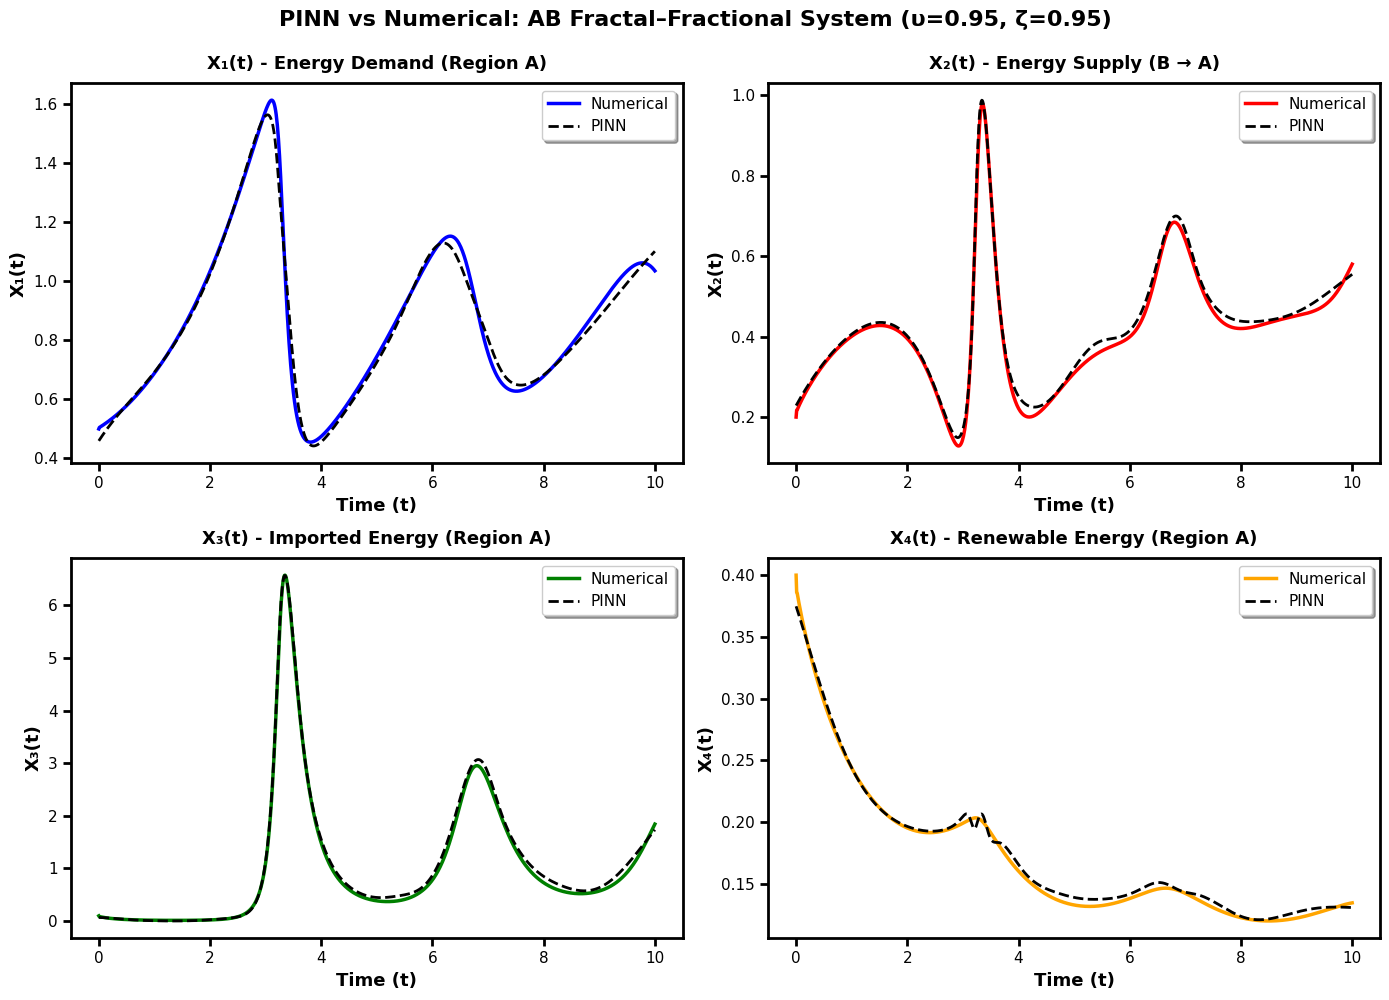

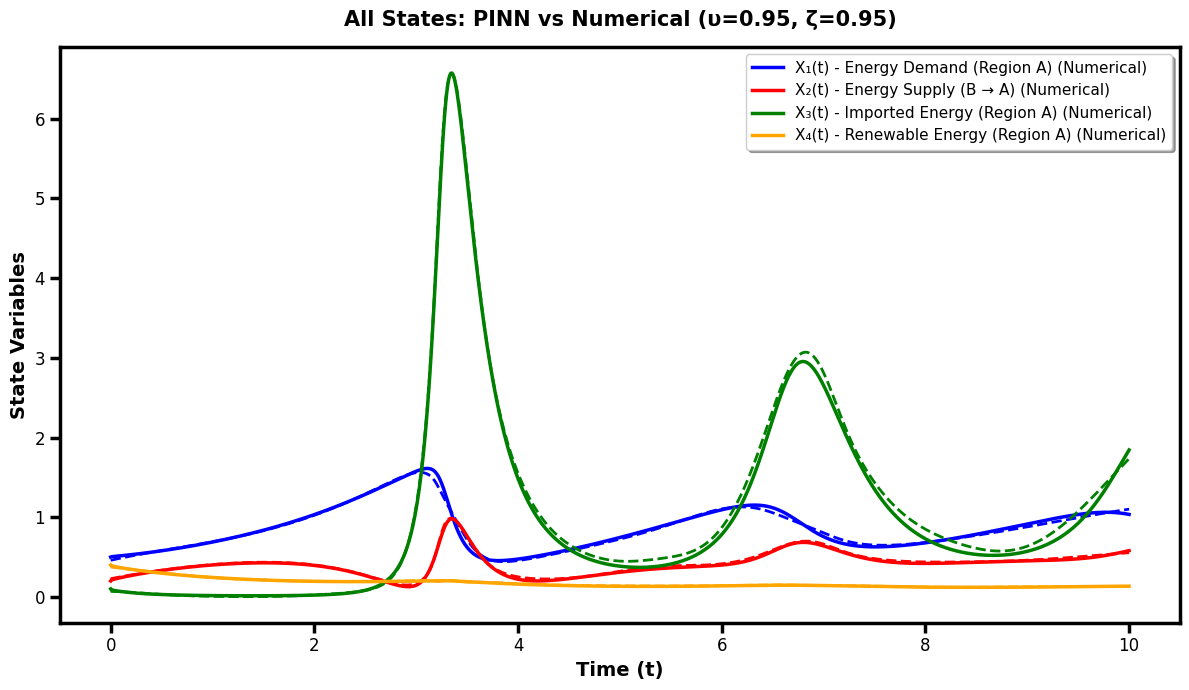

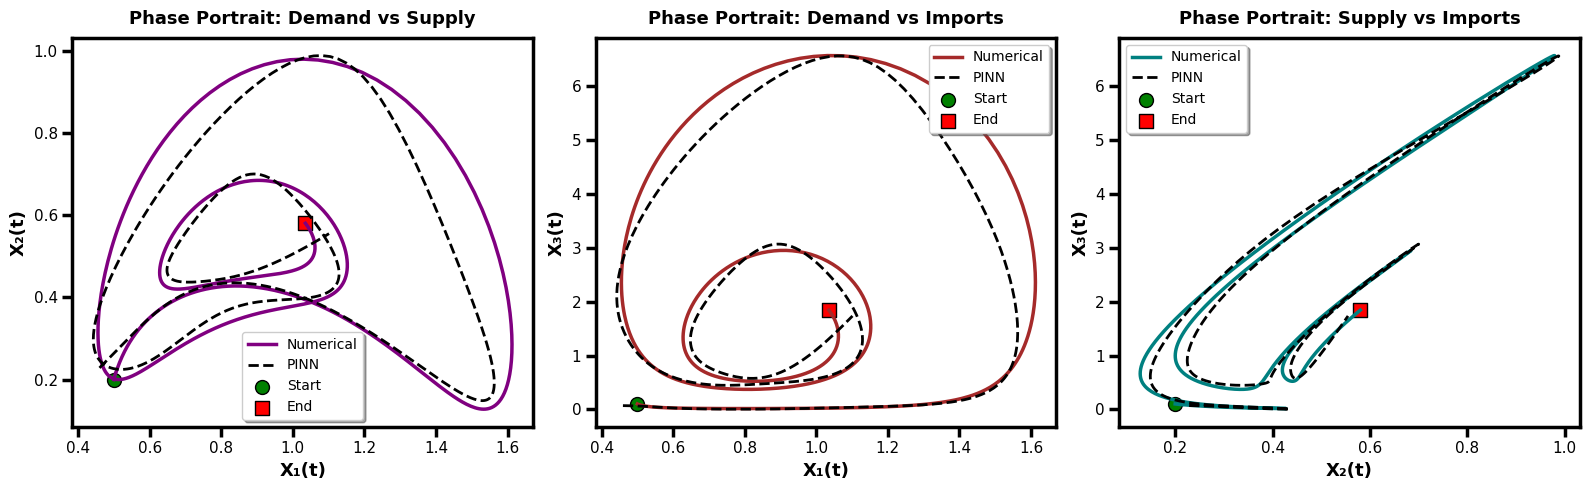

✅ Saved results to 'pinn_results/pinn_fit_visualized.npz'


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Error analysis
# ----------------------------
abs_error = np.abs(X_pred - X_num.astype(np.float32))
rel_error = abs_error / (np.abs(X_num.astype(np.float32)) + 1e-8)
mean_abs = abs_error.mean(axis=0)
mean_rel = rel_error.mean(axis=0)

print("\nMean absolute error per variable:")
for i,v in enumerate(mean_abs,1):
    print(f"  X{i}: {v:.4e}")
print("\nMean relative error per variable:")
for i,v in enumerate(mean_rel,1):
    print(f"  X{i}: {v:.4e}")

# ----------------------------
# Visualization (Professional format)
# ----------------------------
labels = [
    'X₁(t) - Energy Demand (Region A)',
    'X₂(t) - Energy Supply (B → A)',
    'X₃(t) - Imported Energy (Region A)',
    'X₄(t) - Renewable Energy (Region A)'
]
colors = ['blue', 'red', 'green', 'orange']

# --- Subplots: PINN vs Numerical ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i in range(4):
    axes[i].plot(t_num, X_num[:, i], label='Numerical', color=colors[i], linewidth=2.5)
    axes[i].plot(t_num, X_pred[:, i], '--', label='PINN', color='black', linewidth=2)
    axes[i].set_xlabel('Time (t)', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(labels[i].split('-')[0].strip(), fontsize=13, fontweight='bold')
    axes[i].set_title(labels[i], fontsize=13, fontweight='bold', pad=10)
    axes[i].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)
    # Styling
    for spine in axes[i].spines.values():
        spine.set_linewidth(2)
    axes[i].tick_params(axis='both', which='major', labelsize=11, width=2, length=6,
                        direction='out', top=False, right=False)
plt.suptitle(f'PINN vs Numerical: AB Fractal–Fractional System (υ={nu}, ζ={zeta})',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# --- Combined comparison ---
plt.figure(figsize=(12, 7))
for i in range(4):
    plt.plot(t_num, X_num[:, i], label=f'{labels[i]} (Numerical)', color=colors[i], linewidth=2.5)
    plt.plot(t_num, X_pred[:, i], '--', color=colors[i], linewidth=2)
plt.xlabel('Time (t)', fontsize=14, fontweight='bold')
plt.ylabel('State Variables', fontsize=14, fontweight='bold')
plt.title(f'All States: PINN vs Numerical (υ={nu}, ζ={zeta})', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, frameon=True, shadow=True, fancybox=True, loc='best')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2.5)
plt.tick_params(axis='both', which='major', labelsize=12, width=2.5, length=7, direction='out')
plt.tight_layout()
plt.show()

# --- Phase Portraits ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Demand vs Supply', 'Demand vs Imports', 'Supply vs Imports']
colors_phase = ['purple', 'brown', 'teal']

for ax, (i, j), title, col in zip(axes, pairs, titles, colors_phase):
    ax.plot(X_num[:, i], X_num[:, j], color=col, linewidth=2.5, label='Numerical')
    ax.plot(X_pred[:, i], X_pred[:, j], '--', color='black', linewidth=2, label='PINN')
    ax.scatter(X_num[0, i], X_num[0, j], color='green', s=100, marker='o', edgecolors='black', label='Start')
    ax.scatter(X_num[-1, i], X_num[-1, j], color='red', s=100, marker='s', edgecolors='black', label='End')
    ax.set_xlabel(labels[i].split('-')[0].strip(), fontsize=13, fontweight='bold')
    ax.set_ylabel(labels[j].split('-')[0].strip(), fontsize=13, fontweight='bold')
    ax.set_title(f'Phase Portrait: {title}', fontsize=13, fontweight='bold', pad=10)
    ax.legend(fontsize=10, frameon=True, shadow=True, fancybox=True)
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
    ax.tick_params(axis='both', which='major', labelsize=11, width=2.5, length=7, direction='out')

plt.tight_layout()
plt.show()

# ----------------------------
# Save results
# ----------------------------
os.makedirs('pinn_results', exist_ok=True)
np.savez('pinn_results/pinn_fit_visualized.npz',
         t=t_num, X_num=X_num, X_pred=X_pred,
         abs_error=abs_error, rel_error=rel_error)
print("✅ Saved results to 'pinn_results/pinn_fit_visualized.npz'")


Computing numerical reference solution...
Numerical solution computed. Time points: 1001
Starting training (data-assisted PINN)...
Epoch 1/3000 | loss 9.393e+01 | phys 7.663e+00 | data 8.627e-01
  sample preds: [[0.07002773880958557, 0.11570480465888977, 0.01866324245929718, 0.07008586823940277], [0.3945927619934082, 0.0733356922864914, -0.07571245729923248, 0.05472288280725479], [0.4456601142883301, 0.05310088396072388, -0.07050307095050812, 0.05010632425546646], [0.48029518127441406, 0.033487141132354736, -0.02347457781434059, 0.06842425465583801]]
Epoch 100/3000 | loss 3.501e+01 | phys 1.017e-01 | data 3.491e-01
  sample preds: [[0.44649332761764526, 0.3161487579345703, -0.41455963253974915, 0.3194926679134369], [0.9077698588371277, 0.39722293615341187, 1.149115800857544, 0.21669188141822815], [0.8600141406059265, 0.4190905690193176, 1.4412596225738525, 0.1704709231853485], [0.817157506942749, 0.5708075165748596, 0.9687876105308533, 0.10177885740995407]]
Epoch 200/3000 | loss 3.196e

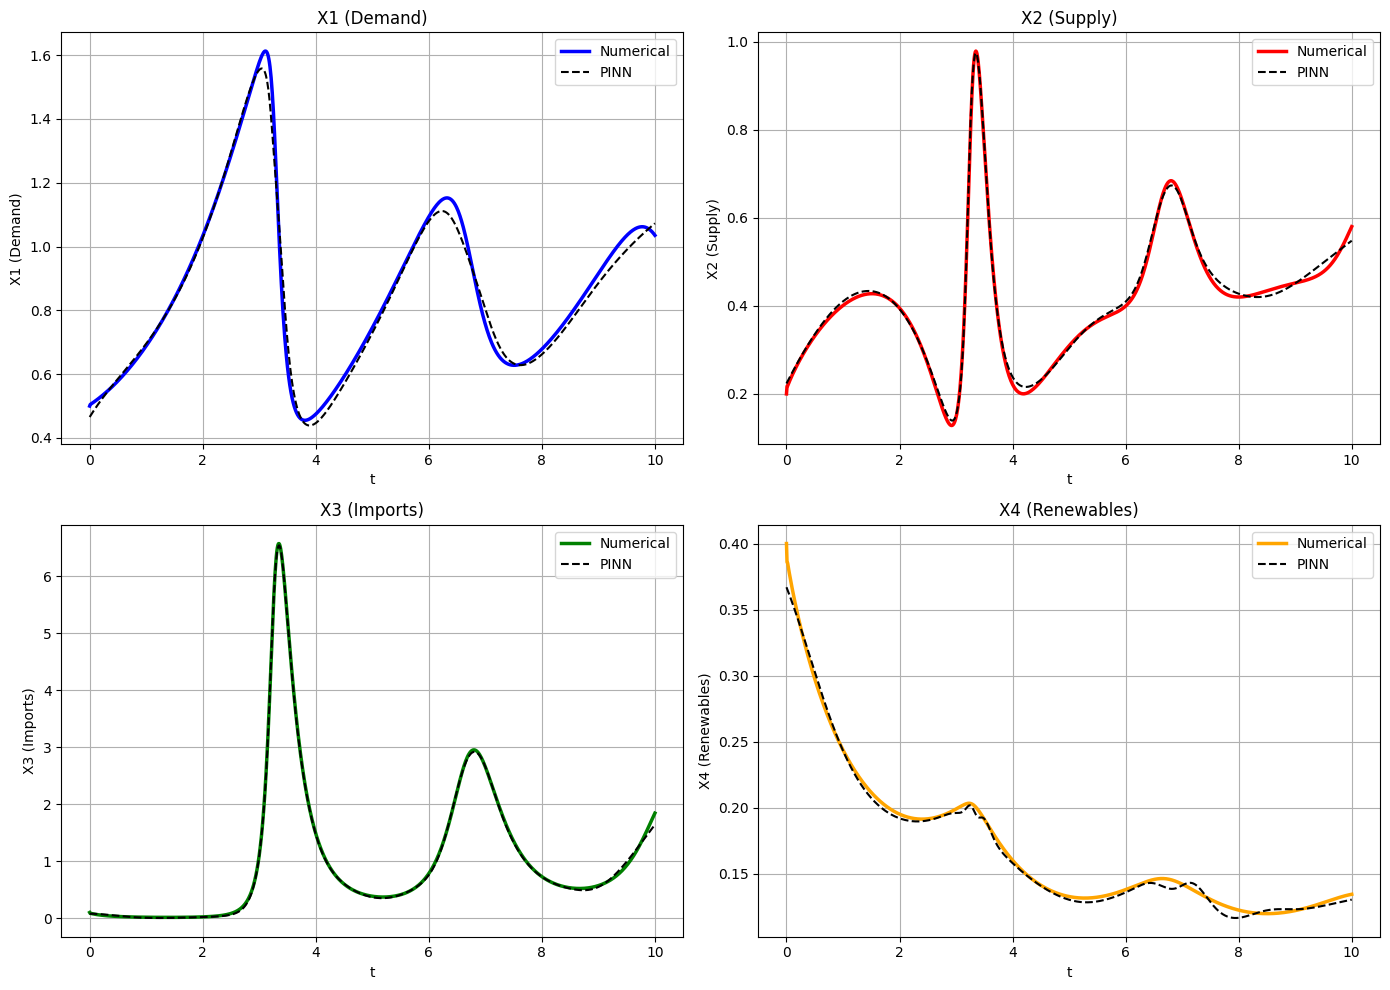

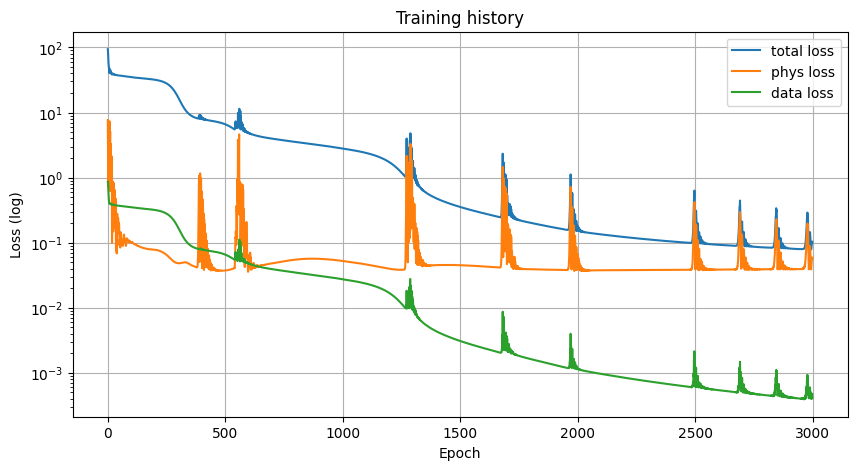

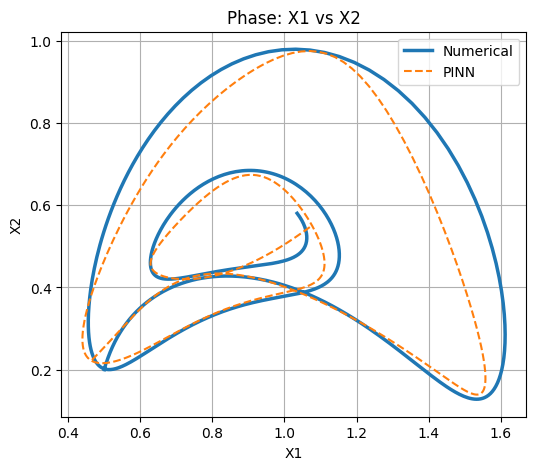

Saved results to 'pinn_results/pinn_fit_to_numerical.npz'

Tips:
 - If PINN underfits, increase network width/depth or increase epochs.
 - If memory/GPU is a constraint, reduce m_q or Nc (collocation points).
 - To prioritize data fit, increase w_data; to emphasize physics, increase w_phys.
 - For better integral accuracy, increase m_q or use Gauss-Jacobi quadrature adapted to kernel.


In [ ]:
# pinn_fit_to_numerical.py
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from scipy.special import gamma as scipy_gamma
import time
import os

# ----------------------------
# Device and dtype
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float32)

# ----------------------------
# Problem parameters (same as yours)
# ----------------------------
ts = 0.01
t = np.arange(0.0, 10.0 + ts, ts)   # numerical grid: 0:0.01:10
N_t = len(t)

upsilon = 0.95
zeta = 0.95

def AB(upsilon):
    if abs(upsilon - 1.0) < 1e-12:
        return 1.0
    return (1.0 - upsilon) + upsilon / scipy_gamma(upsilon)

AB_val = AB(upsilon)
gamma_upsilon = scipy_gamma(upsilon)

# model constants
a1 = 1.0; a2 = 0.6; z1 = 1.0; z2 = 1.2; z3 = 1.5
s1 = 11.0; s2 = 0.7; s3 = 0.6
d1 = 0.1; d2 = 0.7; d3 = 0.8
W = 3.8; N_param = 1.2

# initial condition
X0 = np.array([0.5, 0.2, 0.1, 0.4], dtype=np.float32)

# ----------------------------
# Numerical solver (your method)
# ----------------------------
def numerical_solver(ts=ts):
    t_arr = np.arange(0.0, 10.0 + ts, ts)
    N_t_local = len(t_arr)
    X = np.zeros((N_t_local, 4), dtype=np.float64)
    X[0] = X0.copy()

    for n in range(N_t_local - 1):
        t_np1 = t_arr[n+1]
        H_current = H_vector_numpy(X[n])
        term1 = (zeta * (1 - upsilon) * (t_np1**(zeta - 1.0))) / AB_val * H_current

        term2 = np.zeros(4, dtype=np.float64)
        if n > 0:
            for j in range(n+1):
                xi = t_arr[j]
                if xi > 0:
                    kernel = (t_np1 - xi)**(upsilon - 1.0) * xi**(zeta - 1.0)
                    H_xi = H_vector_numpy(X[j])
                    weight = 0.5 if (j==0 or j==n) else 1.0
                    term2 += weight * kernel * H_xi
            term2 *= ts * (upsilon * zeta) / (AB_val * gamma_upsilon)

        X[n+1] = X[0] + term1 + term2

    return t_arr, X

def H_vector_numpy(Xval):
    # Xval: (...,4) or (4,)
    X1, X2, X3, X4 = Xval[...,0], Xval[...,1], Xval[...,2], Xval[...,3]
    H1 = a1*X1*(1 - X1/W) - a2*X2*(X2 + X3) - d3*X4
    H2 = -z1*X2 - z2*X3 + z3*X1*(N_param - (X1 - X3))
    H3 = s1*X3*(s2*X1 - s3)
    H4 = d1*X1 - d2*X4
    return np.stack([H1, H2, H3, H4], axis=-1)

# Compute numerical solution (this can take some seconds)
print("Computing numerical reference solution...")
t_num, X_num = numerical_solver(ts=ts)
print("Numerical solution computed. Time points:", len(t_num))

# ----------------------------
# Torch wrappers for H
# ----------------------------
def H_torch(X):
    # X: (...,4) torch tensor
    X1 = X[...,0]; X2 = X[...,1]; X3 = X[...,2]; X4 = X[...,3]
    H1 = a1*X1*(1 - X1/W) - a2*X2*(X2 + X3) - d3*X4
    H2 = -z1*X2 - z2*X3 + z3*X1*(N_param - (X1 - X3))
    H3 = s1*X3*(s2*X1 - s3)
    H4 = d1*X1 - d2*X4
    return torch.stack([H1, H2, H3, H4], dim=-1)

# ----------------------------
# PINN network
# ----------------------------
class PINN(nn.Module):
    def __init__(self, hidden_layers=[128,128,128], act=nn.Tanh()):
        super().__init__()
        layers = []
        prev = 1
        for h in hidden_layers:
            layers.append(nn.Linear(prev, h))
            layers.append(act)
            prev = h
        layers.append(nn.Linear(prev, 4))
        self.net = nn.Sequential(*layers)

    def forward(self, t_in):
        # t_in: (B,1)
        return self.net(t_in)

# ----------------------------
# Integral approximation (vectorized)
# ----------------------------
def integral_term_torch(t_batch, net, m_q=40):
    """
    t_batch: (B,1) tensor
    returns term2: (B,4)
    """
    B = t_batch.shape[0]
    device_local = t_batch.device
    m = m_q

    s = torch.linspace(0.0, 1.0, steps=m, device=device_local).reshape(1, m)  # (1,m)
    t_expand = t_batch.reshape(B, 1)  # (B,1)
    xi = t_expand * s                 # (B,m)

    xi_flat = xi.reshape(-1,1)        # (B*m,1)
    X_xi_flat = net(xi_flat)          # (B*m,4)
    X_xi = X_xi_flat.reshape(B, m, 4) # (B,m,4)
    H_xi = H_torch(X_xi)              # (B,m,4)

    t_minus_xi = (t_expand - xi).clamp(min=1e-12)  # (B,m)
    xi_pos = xi.clamp(min=1e-12)                   # (B,m)

    kernel = (t_minus_xi ** (upsilon - 1.0)) * (xi_pos ** (zeta - 1.0))  # (B,m)
    w = torch.ones(m, device=device_local)
    w[0] = 0.5; w[-1] = 0.5
    w = w.reshape(1,m)

    integrand = kernel.unsqueeze(-1) * H_xi  # (B,m,4)
    weighted = (w.unsqueeze(-1) * integrand).sum(dim=1)  # (B,4)

    ds = 1.0 / (m - 1)
    integral_result = weighted * (ds * t_expand)  # (B,4)

    pref = (upsilon * zeta) / (AB_val * gamma_upsilon)
    term2 = pref * integral_result
    return term2

# ----------------------------
# Residual (physics) function
# ----------------------------
def residual_net(t_batch, net, m_q):
    """
    R(t) = net(t) - X0 - term1 - term2
    returns R (B,4) and X_pred (B,4)
    """
    t_batch = t_batch.reshape(-1,1)
    t_req = t_batch.clone().detach().requires_grad_(True)
    X_pred = net(t_req)   # (B,4)
    H_curr = H_torch(X_pred)  # (B,4)

    t_pow = (t_req.clamp(min=1e-12) ** (zeta - 1.0))
    term1 = (zeta * (1.0 - upsilon) * t_pow / AB_val) * H_curr  # (B,4)

    term2 = integral_term_torch(t_req, net, m_q=m_q)  # (B,4)

    X0_t = torch.tensor(X0, dtype=torch.float32, device=device).reshape(1,4)
    X0_rep = X0_t.repeat(X_pred.shape[0], 1)
    R = X_pred - X0_rep - term1 - term2
    return R, X_pred

# ----------------------------
# Training: combined loss (physics + supervised)
# ----------------------------
def train_data_assisted_pinn(net,
                             t_collocation,
                             t_supervised,
                             X_supervised,
                             epochs=3000,
                             m_q=40,
                             lr=1e-3,
                             w_phys=1.0,
                             w_data=100.0,
                             print_every=100):

    opt = torch.optim.Adam(net.parameters(), lr=lr)
    # Add a scheduler: reduce LR every 2000 epochs by factor 0.5
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=1000, gamma=0.8)

    mse = nn.MSELoss()
    history = {'loss':[], 'loss_phys':[], 'loss_data':[]}
    start = time.time()

    for ep in range(1, epochs+1):
        opt.zero_grad()

        # physics loss (residual)
        R, _ = residual_net(t_collocation, net, m_q=m_q)
        loss_phys = mse(R, torch.zeros_like(R))

        # data loss (supervised)
        X_pred_data = net(t_supervised)
        loss_data = mse(X_pred_data, X_supervised)

        loss = w_phys * loss_phys + w_data * loss_data
        loss.backward()
        opt.step()
        scheduler.step()  # update learning rate dynamically

        history['loss'].append(float(loss.item()))
        history['loss_phys'].append(float(loss_phys.item()))
        history['loss_data'].append(float(loss_data.item()))

        if ep % print_every == 0 or ep==1:
            with torch.no_grad():
                t_check = torch.tensor([[0.0],[t_num[-1]*0.25],[t_num[-1]*0.5],[t_num[-1]]],
                                       dtype=torch.float32, device=device)
                Xc = net(t_check).cpu().numpy()
            print(f"Epoch {ep}/{epochs} | loss {loss.item():.3e} | phys {loss_phys.item():.3e} | data {loss_data.item():.3e}")
            print("  sample preds:", Xc.tolist())

    end = time.time()
    print(f"Training time: {end-start:.2f} s")
    return net, history

# ----------------------------
# Prepare collocation and supervised data
# ----------------------------
# Collocation points: sample in (0, t_final], avoid exactly 0 due to kernel singularity
Nc = 800            # number of collocation points for physics constraint
Nd = 400            # number of supervised points (from numerical solution)
np.random.seed(42)

# collocation times (random subset of numerical grid excluding t=0)
coll_idx = np.random.choice(np.arange(1, N_t), size=Nc, replace=False)
t_coll = t_num[coll_idx].astype(np.float32).reshape(-1,1)
t_coll_t = torch.tensor(t_coll, dtype=torch.float32, device=device)

# supervised (data) times: choose Nd points from numerical grid (could be all)
data_idx = np.linspace(0, N_t-1, Nd, dtype=int)
t_data = t_num[data_idx].astype(np.float32).reshape(-1,1)
X_data = X_num[data_idx].astype(np.float32)
t_data_t = torch.tensor(t_data, dtype=torch.float32, device=device)
X_data_t = torch.tensor(X_data, dtype=torch.float32, device=device)

# ----------------------------
# Initialize network and train
# ----------------------------
net = PINN(hidden_layers=[128,128,128]).to(device)

# hyperparameters you can tune
epochs = 3000
m_q = 40
lr = 1e-3
w_phys = 1.0
w_data = 100.0   # strong weight to force fit to numerical solution

print("Starting training (data-assisted PINN)...")
net, history = train_data_assisted_pinn(net,
                                       t_collocation=t_coll_t,
                                       t_supervised=t_data_t,
                                       X_supervised=X_data_t,
                                       epochs=epochs,
                                       m_q=m_q,
                                       lr=lr,
                                       w_phys=w_phys,
                                       w_data=w_data,
                                       print_every=100)

# ----------------------------
# Evaluate on full grid and compare
# ----------------------------
t_grid = t_num.astype(np.float32).reshape(-1,1)
t_grid_t = torch.tensor(t_grid, dtype=torch.float32, device=device)
with torch.no_grad():
    X_pred = net(t_grid_t).cpu().numpy()

# errors
abs_error = np.abs(X_pred - X_num.astype(np.float32))
rel_error = abs_error / (np.abs(X_num.astype(np.float32)) + 1e-8)
mean_abs = abs_error.mean(axis=0)
mean_rel = rel_error.mean(axis=0)

print("\nMean absolute error per variable:")
for i,v in enumerate(mean_abs,1):
    print(f"  X{i}: {v:.4e}")
print("\nMean relative error per variable:")
for i,v in enumerate(mean_rel,1):
    print(f"  X{i}: {v:.4e}")

# ----------------------------
# Plot results
# ----------------------------
labels = ['X1 (Demand)','X2 (Supply)','X3 (Imports)','X4 (Renewables)']
colors = ['b','r','g','orange']

plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(t_num, X_num[:,i], label='Numerical', color=colors[i], linewidth=2.5)
    plt.plot(t_num, X_pred[:,i], '--', label='PINN', color='k', linewidth=1.5)
    plt.xlabel('t'); plt.ylabel(labels[i])
    plt.title(labels[i])
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.semilogy(history['loss'], label='total loss')
plt.semilogy(history['loss_phys'], label='phys loss')
plt.semilogy(history['loss_data'], label='data loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (log)')
plt.legend(); plt.grid(True)
plt.title('Training history')
plt.show()

# phase portrait example
plt.figure(figsize=(6,5))
plt.plot(X_num[:,0], X_num[:,1], label='Numerical', lw=2.5)
plt.plot(X_pred[:,0], X_pred[:,1], '--', label='PINN', lw=1.5)
plt.xlabel('X1'); plt.ylabel('X2'); plt.legend(); plt.grid(True)
plt.title('Phase: X1 vs X2')
plt.show()

# save results
os.makedirs('pinn_results', exist_ok=True)
np.savez('pinn_results/pinn_fit_to_numerical.npz',
         t=t_num, X_num=X_num, X_pred=X_pred,
         abs_error=abs_error, rel_error=rel_error)
print("Saved results to 'pinn_results/pinn_fit_to_numerical.npz'")

# ----------------------------
# Tips / next steps printed
# ----------------------------
print("\nTips:")
print(" - If PINN underfits, increase network width/depth or increase epochs.")
print(" - If memory/GPU is a constraint, reduce m_q or Nc (collocation points).")
print(" - To prioritize data fit, increase w_data; to emphasize physics, increase w_phys.")
print(" - For better integral accuracy, increase m_q or use Gauss-Jacobi quadrature adapted to kernel.")



Mean absolute error per variable:
  X1: 2.2062e-02
  X2: 7.7197e-03
  X3: 1.7253e-02
  X4: 2.9564e-03

Mean relative error per variable:
  X1: 2.6871e-02
  X2: 2.1894e-02
  X3: 1.0982e-01
  X4: 1.8093e-02


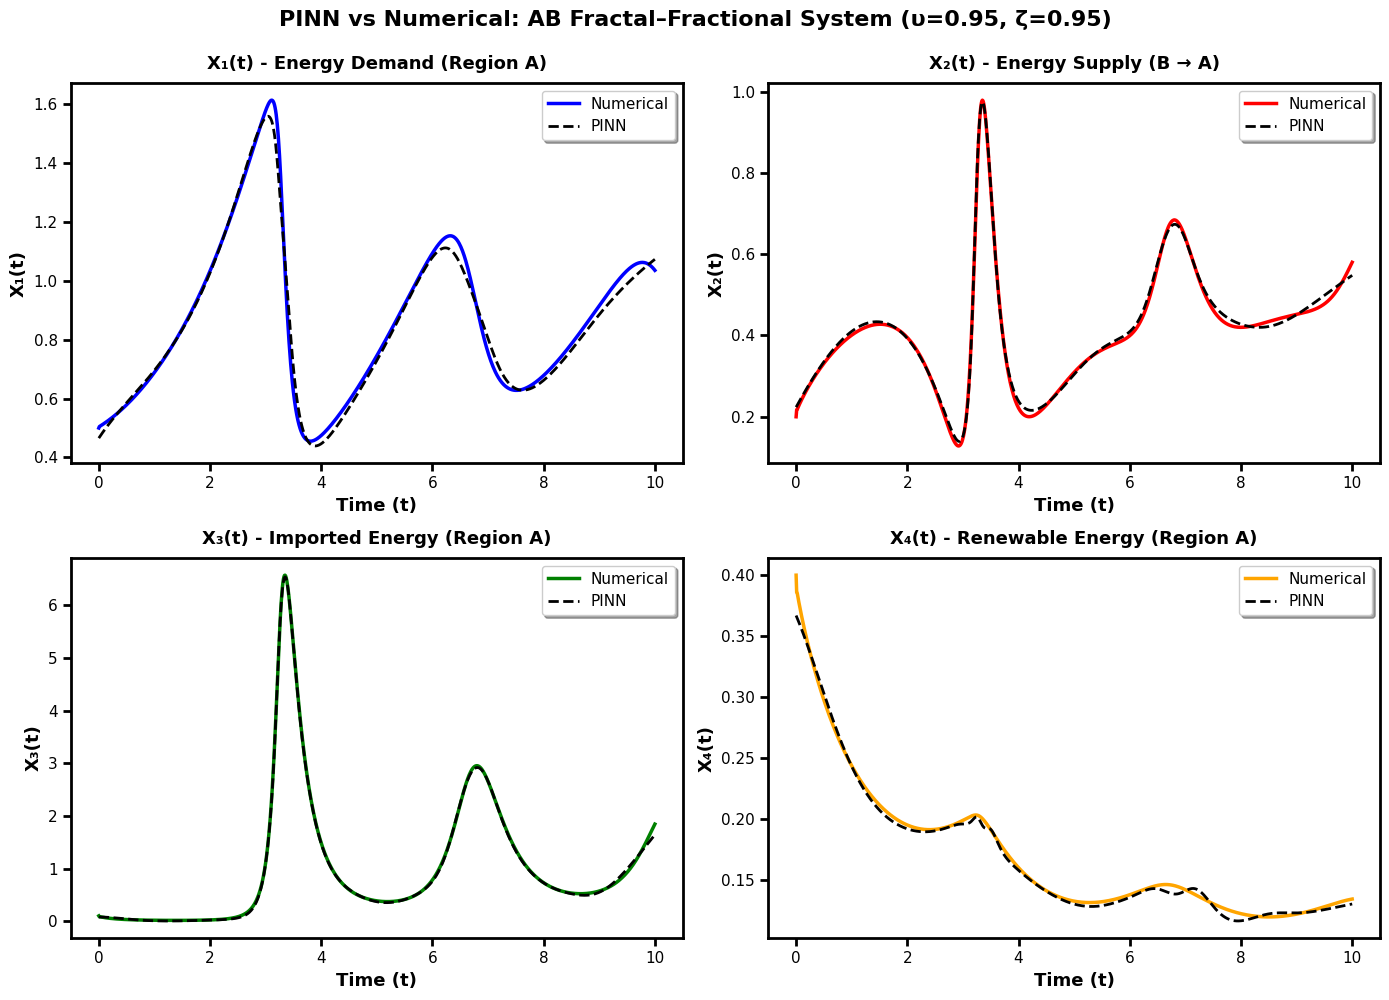

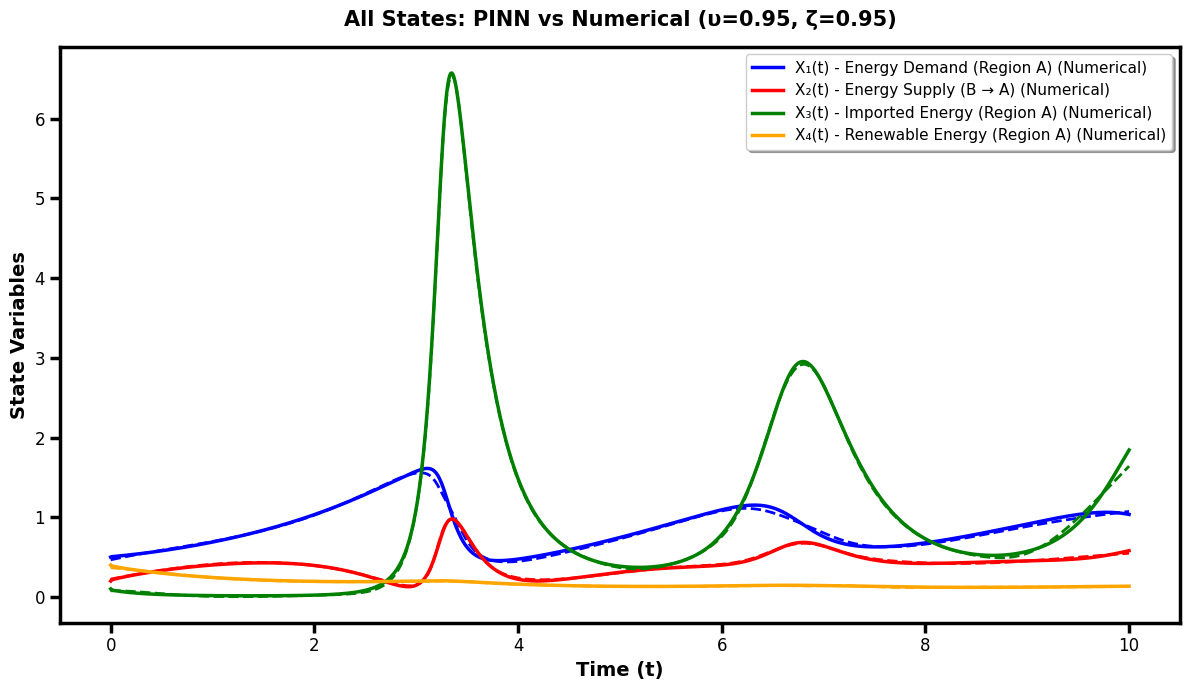

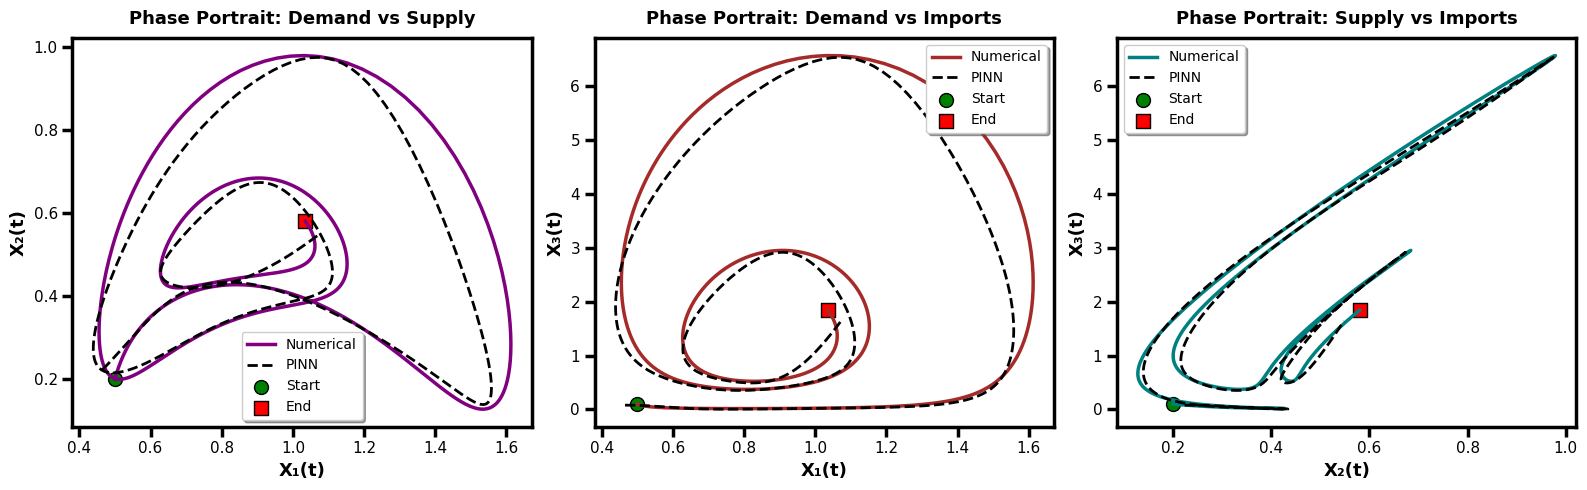

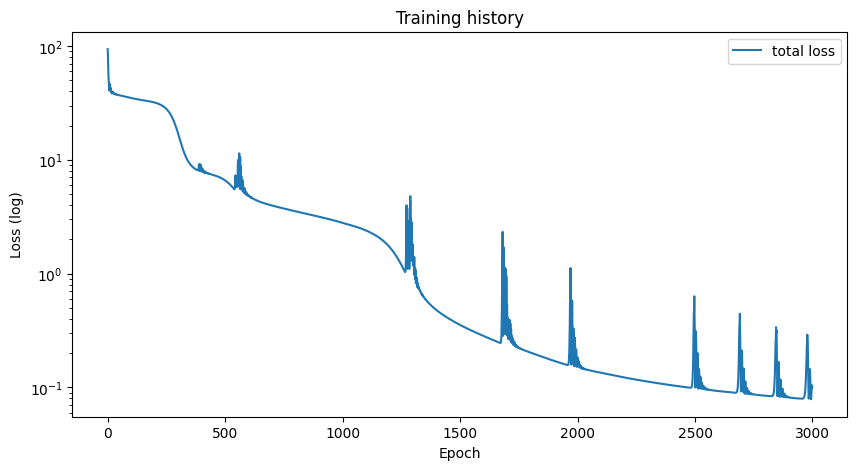

✅ Saved results to 'pinn_results/pinn_fit_visualized.npz'


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
t_grid = t_num.astype(np.float32).reshape(-1,1)
t_grid_t = torch.tensor(t_grid, dtype=torch.float32, device=device)
with torch.no_grad():
    X_pred = net(t_grid_t).cpu().numpy()
# ----------------------------
# Error analysis
# ----------------------------
abs_error = np.abs(X_pred - X_num.astype(np.float32))
rel_error = abs_error / (np.abs(X_num.astype(np.float32)) + 1e-8)
mean_abs = abs_error.mean(axis=0)
mean_rel = rel_error.mean(axis=0)

print("\nMean absolute error per variable:")
for i,v in enumerate(mean_abs,1):
    print(f"  X{i}: {v:.4e}")
print("\nMean relative error per variable:")
for i,v in enumerate(mean_rel,1):
    print(f"  X{i}: {v:.4e}")

# ----------------------------
# Visualization (Professional format)
# ----------------------------
labels = [
    'X₁(t) - Energy Demand (Region A)',
    'X₂(t) - Energy Supply (B → A)',
    'X₃(t) - Imported Energy (Region A)',
    'X₄(t) - Renewable Energy (Region A)'
]
colors = ['blue', 'red', 'green', 'orange']

# --- Subplots: PINN vs Numerical ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i in range(4):
    axes[i].plot(t_num, X_num[:, i], label='Numerical', color=colors[i], linewidth=2.5)
    axes[i].plot(t_num, X_pred[:, i], '--', label='PINN', color='black', linewidth=2) # Changed t_pred to t_num
    axes[i].set_xlabel('Time (t)', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(labels[i].split('-')[0].strip(), fontsize=13, fontweight='bold')
    axes[i].set_title(labels[i], fontsize=13, fontweight='bold', pad=10)
    axes[i].legend(fontsize=11, frameon=True, shadow=True, fancybox=True)
    # Styling
    for spine in axes[i].spines.values():
        spine.set_linewidth(2)
    axes[i].tick_params(axis='both', which='major', labelsize=11, width=2, length=6,
                        direction='out', top=False, right=False)
plt.suptitle(f'PINN vs Numerical: AB Fractal–Fractional System (υ={upsilon}, ζ={zeta})',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# --- Combined comparison ---
plt.figure(figsize=(12, 7))
for i in range(4):
    plt.plot(t_num, X_num[:, i], label=f'{labels[i]} (Numerical)', color=colors[i], linewidth=2.5)
    plt.plot(t_num, X_pred[:, i], '--', color=colors[i], linewidth=2) # Changed t_pred to t_num
plt.xlabel('Time (t)', fontsize=14, fontweight='bold')
plt.ylabel('State Variables', fontsize=14, fontweight='bold')
plt.title(f'All States: PINN vs Numerical (υ={upsilon}, ζ={zeta})', fontsize=15, fontweight='bold', pad=15)
plt.legend(fontsize=11, frameon=True, shadow=True, fancybox=True, loc='best')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2.5)
plt.tick_params(axis='both', which='major', labelsize=12, width=2.5, length=7, direction='out')
plt.tight_layout()
plt.show()

# --- Phase Portraits ---
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['Demand vs Supply', 'Demand vs Imports', 'Supply vs Imports']
colors_phase = ['purple', 'brown', 'teal']

for ax, (i, j), title, col in zip(axes, pairs, titles, colors_phase):
    ax.plot(X_num[:, i], X_num[:, j], color=col, linewidth=2.5, label='Numerical')
    ax.plot(X_pred[:, i], X_pred[:, j], '--', color='black', linewidth=2, label='PINN')
    ax.scatter(X_num[0, i], X_num[0, j], color='green', s=100, marker='o', edgecolors='black', label='Start')
    ax.scatter(X_num[-1, i], X_num[-1, j], color='red', s=100, marker='s', edgecolors='black', label='End')
    ax.set_xlabel(labels[i].split('-')[0].strip(), fontsize=13, fontweight='bold')
    ax.set_ylabel(labels[j].split('-')[0].strip(), fontsize=13, fontweight='bold')
    ax.set_title(f'Phase Portrait: {title}', fontsize=13, fontweight='bold', pad=10)
    ax.legend(fontsize=10, frameon=True, shadow=True, fancybox=True)
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
    ax.tick_params(axis='both', which='major', labelsize=11, width=2.5, length=7, direction='out')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
plt.semilogy(history['loss'], label='total loss')
plt.xlabel('Epoch'); plt.ylabel('Loss (log)')
plt.legend();
plt.title('Training history')
plt.show()
# ----------------------------
# Save results
# ----------------------------
os.makedirs('pinn_results', exist_ok=True)
np.savez('pinn_results/pinn_fit_visualized.npz',
         t=t_num, X_num=X_num, X_pred=X_pred,
         abs_error=abs_error, rel_error=rel_error)
print("✅ Saved results to 'pinn_results/pinn_fit_visualized.npz'")